# Complex Networks Computational Session
# Adjacency Matrix, Random Graphs, and Stochastic Block Models (SBM)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
# Function to visualize an adjacency matrix
def plot_adjacency_matrix(adj_matrix, title="Adjacency Matrix"):
    plt.figure(figsize=(6,6))
    plt.imshow(adj_matrix, cmap='gray_r', interpolation='none')
    plt.title(title)
    plt.colorbar(label="Edge Weight")
    plt.show()

# Check if A is symmetric (difference between A and A.T is zero) without using numpy's isclose function
def is_symmetric(A):
    return np.all(A - A.T == 0)



In [3]:
# 1. Construct a small adjacency matrix manually
adj_matrix = np.array([
    [0, 1, 1, 0],
    [1, 0, 1, 1],
    [1, 1, 0, 1],
    [0, 1, 1, 0]
])

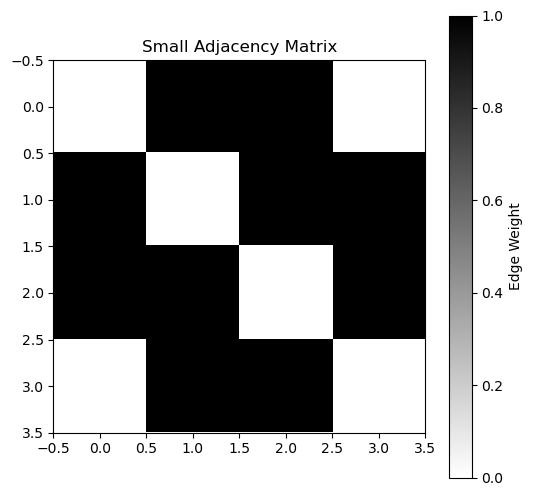

In [5]:
plot_adjacency_matrix(adj_matrix, "Small Adjacency Matrix")

## Graphs (toy models)
### Lattices

In [3]:
# 2.1 Lattice Graph
# def generate_lattice(n):
#     adj = np.zeros((n, n))
#     adj[0,n-1]=1
#     adj[n-1,0]=1
#     adj[0,1]=1
#     adj[n-1,n-2]=1
#     for i in range(1,n-1):
#         adj[i, i-1] = 1  # Connect to previous node
#         adj[i, i+1] = 1  # Connect to next node
#     return adj

def generate_lattice(n):
   adj = np.zeros((n, n))
   for i in range(n):
       adj[i, (i-1) % n] = 1  # Connect to previous node
       adj[i, (i+1) % n] = 1  # Connect to next node
   return adj

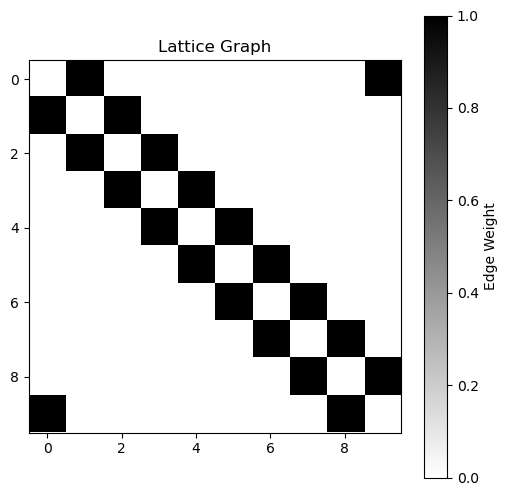

In [4]:
A=generate_lattice(10)
plot_adjacency_matrix(A, "Lattice Graph")

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

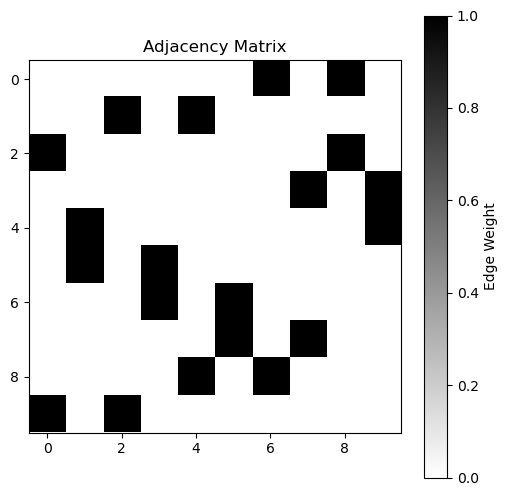

In [12]:
# random permutation of the rows
plot_adjacency_matrix(np.random.permutation(A))


In [6]:
# Bidimensional Lattice
def generate_bidim_lattice(n):
    adj = np.zeros((n**2, n**2))
    for i in range(n):
        for j in range(n):
            node = i*n + j
            adj[node, (i-1) % n * n + j] = 1  # Connect to node above
            adj[node, (i+1) % n * n + j] = 1  # Connect to node below
            adj[node, i * n + (j-1) % n] = 1  # Connect to node on the left
            adj[node, i * n + (j+1) % n] = 1  # Connect to node on the right
    return adj

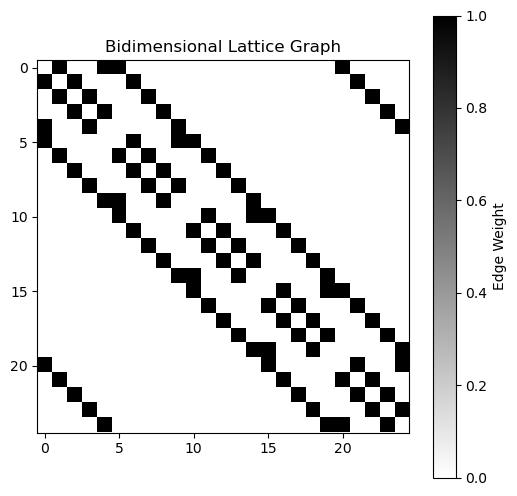

In [7]:
A=generate_bidim_lattice(5)
plot_adjacency_matrix(A, "Bidimensional Lattice Graph")

## Random graphs
### Microcanonical ensemble of networks with N nodes and M edges

In [9]:
N=100
M=2000

# Create n random graphs
n=100

Ms=np.zeros(n)
for i in tqdm(range(n)):
    A = np.zeros((N,N))
    for j in range(M):
        a = np.random.randint(0,N)
        b = np.random.randint(0,N)
        while a==b or A[a,b]==1:
            a = np.random.randint(0,N)
            b = np.random.randint(0,N)
        A[a,b]=1
        A[b,a]=1
    # Save number of edges
    Ms[i]=np.sum(A)/2


100%|██████████| 100/100 [00:02<00:00, 35.74it/s]


### Canonical ensemble of networks with N nodes (Erdos-Renyi graph)

In [17]:
N=100
p=0.1
n=100

Ms=np.zeros(n)
for i in tqdm(range(n)):
    # Matrix of random numbers between 0 and 1 (uniform distribution)
    A = np.random.rand(N,N)
    # Create adjacency matrix
    A = A<p
    # Make it symmetric
    A = np.triu(A,1)
    A = A + A.T
    # Save number of edges
    Ms[i]=np.sum(A)/2

100%|██████████| 100/100 [00:00<00:00, 3745.78it/s]


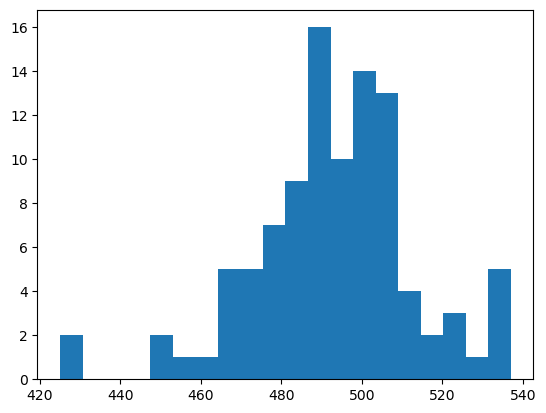

In [18]:
plt.hist(Ms, bins=20);

In [19]:
def erdos_renyi(N,p):
    A = np.random.rand(N,N)
    A = A<p
    A = np.triu(A,1)
    A = A + A.T
    return A


Number of edges: 4950.0
1.0


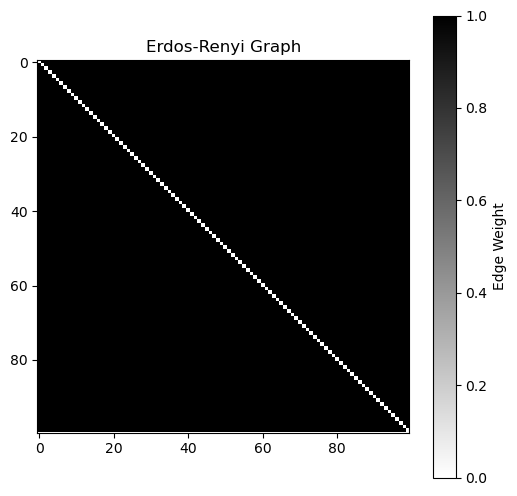

In [24]:
# Density
N=100
A=erdos_renyi(N,1)
M=np.sum(A)/2
print('Number of edges:',M)
density = M/(N*(N-1)/2)
print(density)
plot_adjacency_matrix(A, "Erdos-Renyi Graph")

Text(0, 0.5, 'st.dev / mean number of edges')

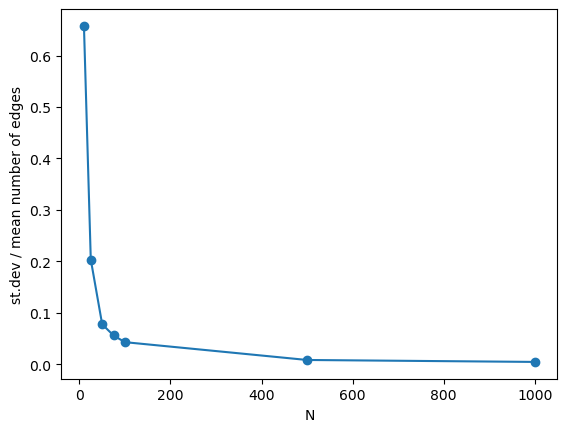

In [22]:
# Ratio between standard deviation and mean number of edges goes to zero as N increases (termodynamic limit)
n=100
Ns=[10,25,50,75,100,500,1000]
ratios=[]
for N in Ns:
    Ms=np.zeros(n)
    for i in range(n):
        A = erdos_renyi(N,0.1)
        M=np.sum(A)/2
        Ms[i]=M
    ratios.append(np.std(Ms)/np.mean(M))

plt.plot(Ns,ratios,'o-')
plt.xlabel('N')
plt.ylabel('st.dev / mean number of edges')

## Stochastic Block Model (SBM)

In [9]:
def generate_sbm(sizes, p_in, p_out):
    n = sum(sizes)
    adj = np.zeros((n, n))
    # Intra-community links
    start = 0
    for i, size in enumerate(sizes):
        end = start + size
        adj[start:end, start:end] = np.random.rand(size, size) < p_in[i]
        #simmetrize
        adj[start:end, start:end] = np.triu(adj[start:end, start:end],1)
        adj[start:end, start:end] = adj[start:end, start:end] + adj[start:end, start:end].T
        start = end
    # Inter-community links
    for i in range(len(sizes)):
        for j in range(i+1, len(sizes)):
            start_i, end_i = sum(sizes[:i]), sum(sizes[:i+1])
            start_j, end_j = sum(sizes[:j]), sum(sizes[:j+1])
            adj[start_i:end_i, start_j:end_j] = np.random.rand(end_i-start_i, end_j-start_j) < p_out[i,j]
            adj[start_j:end_j, start_i:end_i] = adj[start_i:end_i, start_j:end_j].T
    return adj

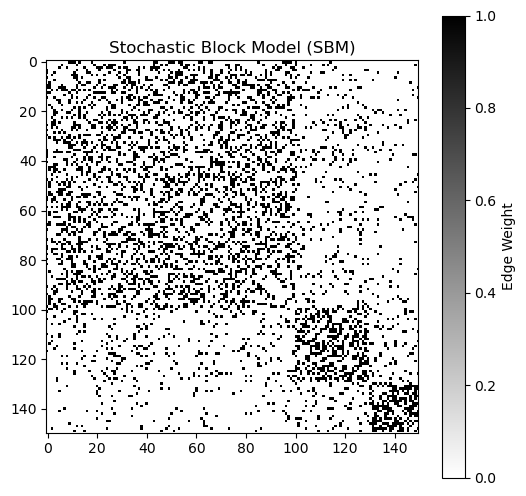

In [10]:
sizes = [100, 30, 20]  # Three communities of size 5
p_in = [0.3, 0.4, 0.5]  # High intra-cluster density
p_out = np.array([[0, 0.1, 0.05], 
                  [0.1, 0, 0.1],
                  [0.05, 0.1, 0]])  # Sparse inter-cluster density

# N.B. actually it is considering only the upper triangular part of the block connectivity matrix

sbm_adj = generate_sbm(sizes, p_in, p_out)
plot_adjacency_matrix(sbm_adj, "Stochastic Block Model (SBM)")

## NetworkX

In [6]:
import networkx as nx

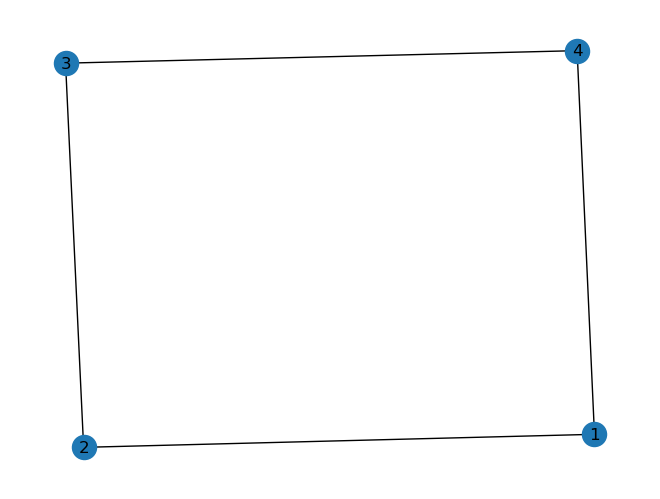

In [7]:
# Create a simple graph
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,4)
G.add_edge(4,1)
nx.draw(G, with_labels=True)

In [14]:
nx.adjacency_matrix(G).todense()

array([[0, 1, 0, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [1, 0, 1, 0]], dtype=int32)

### Giant component transition on ER graphs

In [13]:
N=200

# Matrix of random numbers between 0 and 1 (uniform distribution)
A = np.random.rand(N,N)
ps=np.logspace(-4,0,20)
Ms=np.zeros(len(ps))
GCs=np.zeros(len(ps))
for i,p in tqdm(enumerate(ps)):
    # Create adjacency matrix
    Ai = A<p
    # Make it symmetric
    Ai = np.triu(Ai,1)
    Ai = Ai + Ai.T
    # Create a graph
    G = nx.Graph(Ai)
    
    components = list(nx.connected_components(G))
    # Get the giant component
    comp_sizes = [len(comp) for comp in components]
    GCs[i] = max(comp_sizes)

    

20it [00:02,  9.10it/s]


Text(0, 0.5, 'Size of the giant component')

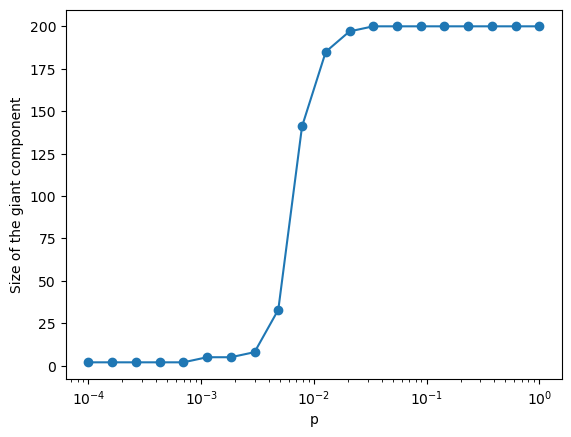

In [14]:
# Plot p and the size of the giant component
plt.plot(ps,GCs,'-o')
plt.xscale('log')
plt.xlabel('p')
plt.ylabel('Size of the giant component')